# EDA on Cars.csv

In [1]:
data_path='./data/'
data_file = 'cars.csv'

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.2.4


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
cars=pd.read_csv(data_path+data_file)

In [15]:
cars.columns

Index(['name', 'modelDate', 'model', 'color', 'brand', 'price', 'miles',
       'model_year', 'dpm', 'years_used', 'dpm_adj_yr', 'depreciate_add',
       'estimated_orig_cost', 'loss_value'],
      dtype='object')

In [16]:
cars['brand'].value_counts(normalize=True)

Volkswagen    0.333333
Tesla         0.277778
BMW           0.222222
Toyota        0.166667
Name: brand, dtype: float64

In [17]:
cars['brand'].value_counts().index.to_list()

['Volkswagen', 'Tesla', 'BMW', 'Toyota']

In [18]:
# taking a huge leap as we have an issue with very few instances per model as 
# seen below.
cars['model'].value_counts(normalize=True)

Model 3              0.145503
Model S              0.126984
3 Series             0.068783
Passat               0.058201
Tiguan               0.055556
Corolla              0.044974
Camry                0.034392
Beetle               0.034392
Golf GTI             0.031746
Jetta                0.029101
RAV4                 0.029101
X1                   0.023810
Golf SportWagen      0.023810
Golf                 0.023810
Atlas                0.021164
5 Series             0.021164
4 Series             0.021164
X3                   0.018519
X5                   0.015873
i3                   0.015873
Jetta SportWagen     0.015873
6 Series             0.013228
Highlander           0.013228
Prius v              0.010582
2 Series             0.007937
Sienna               0.007937
GTI                  0.005291
Corolla iM           0.005291
Golf Alltrack        0.005291
Avalon               0.005291
Prius                0.005291
Tiguan Limited       0.005291
Eos                  0.005291
7 Series  

In [19]:
cols_selected = ['brand','color','miles','model_year','price']
cars[cols_selected]

,brand,color,miles,model_year,price
0,BMW,Blue,65012,2016,25990
1,BMW,Red,24643,2017,32990
2,BMW,White,77118,2015,13990
3,BMW,Silver,37131,2014,13990
4,BMW,Gray,53446,2014,15990
...,...,...,...,...,...
373,Volkswagen,Gray,60940,2012,14990
374,Volkswagen,Black,40867,2016,15990
375,Volkswagen,Gray,65330,2013,11990
376,Volkswagen,Black,41884,2014,12590


In [20]:
cars[cols_selected].to_pickle('./data/cars.pkl')

In [8]:
# README.md shortcuts and tips

In [9]:
print(cars['color'].value_counts(normalize=False).to_markdown())

|        |   color |
|:-------|--------:|
| Black  |     100 |
| White  |      72 |
| Gray   |      65 |
| Blue   |      55 |
| Silver |      46 |
| Red    |      19 |
| Brown  |      16 |
| Green  |       4 |
| Orange |       1 |


In [11]:
print(cars[cols_selected].describe().to_markdown())

|       |    miles |   model_year |   price |
|:------|---------:|-------------:|--------:|
| count |    378   |    378       |   378   |
| mean  |  48160.3 |   2015.64    | 24250.3 |
| std   |  26431.6 |      2.48965 | 11884.3 |
| min   |    826   |   2009       |  9590   |
| 25%   |  24863.8 |   2014       | 14140   |
| 50%   |  46422   |   2015       | 20590   |
| 75%   |  69351.2 |   2018       | 33440   |
| max   | 104132   |   2020       | 86990   |


In [12]:
pd.get_dummies(cars['brand'])

,BMW,Tesla,Toyota,Volkswagen
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
373,0,0,0,1
374,0,0,0,1
375,0,0,0,1
376,0,0,0,1


In [6]:
# get only the unique items in our list to build a formula to select cars
pd.get_dummies(cars['brand']).drop_duplicates()

,BMW,Tesla,Toyota,Volkswagen
0,1,0,0,0
84,0,1,0,0
189,0,0,1,0
252,0,0,0,1


In [7]:
brand_matrix = pd.get_dummies(cars['brand']).drop_duplicates().set_index(pd.get_dummies(cars['brand']).drop_duplicates().columns)

In [8]:
brand_matrix.loc['Toyota'].tolist()

[0, 0, 1, 0]

In [9]:
pd.get_dummies(cars['color'].sort_values()).drop_duplicates()

,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
162,1,0,0,0,0,0,0,0,0
177,0,1,0,0,0,0,0,0,0
206,0,0,1,0,0,0,0,0,0
55,0,0,0,1,0,0,0,0,0
277,0,0,0,0,1,0,0,0,0
60,0,0,0,0,0,1,0,0,0
349,0,0,0,0,0,0,1,0,0
30,0,0,0,0,0,0,0,1,0
37,0,0,0,0,0,0,0,0,1


In [10]:
color_matrix = pd.get_dummies(cars['color'].sort_values()).drop_duplicates().set_index(pd.get_dummies(cars['color']).drop_duplicates().columns)

In [11]:
color_matrix

,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
Black,1,0,0,0,0,0,0,0,0
Blue,0,1,0,0,0,0,0,0,0
Brown,0,0,1,0,0,0,0,0,0
Gray,0,0,0,1,0,0,0,0,0
Green,0,0,0,0,1,0,0,0,0
Orange,0,0,0,0,0,1,0,0,0
Red,0,0,0,0,0,0,1,0,0
Silver,0,0,0,0,0,0,0,1,0
White,0,0,0,0,0,0,0,0,1


In [13]:
color_matrix.loc['Black'].tolist()

[1, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
# pd.concat
cars_encoded = pd.concat([cars[cols_selected],pd.get_dummies(cars['brand']),pd.get_dummies(cars['color'])],axis=1)

In [39]:
cars_encoded

,brand,color,miles,model_year,price,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
0,BMW,Blue,65012,2016,25990,1,0,0,0,0,1,0,0,0,0,0,0,0
1,BMW,Red,24643,2017,32990,1,0,0,0,0,0,0,0,0,0,1,0,0
2,BMW,White,77118,2015,13990,1,0,0,0,0,0,0,0,0,0,0,0,1
3,BMW,Silver,37131,2014,13990,1,0,0,0,0,0,0,0,0,0,0,1,0
4,BMW,Gray,53446,2014,15990,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Volkswagen,Gray,60940,2012,14990,0,0,0,1,0,0,0,1,0,0,0,0,0
374,Volkswagen,Black,40867,2016,15990,0,0,0,1,1,0,0,0,0,0,0,0,0
375,Volkswagen,Gray,65330,2013,11990,0,0,0,1,0,0,0,1,0,0,0,0,0
376,Volkswagen,Black,41884,2014,12590,0,0,0,1,1,0,0,0,0,0,0,0,0


In [40]:
cars_encoded = cars_encoded[['miles', 'model_year', 'BMW', 'Tesla',
       'Toyota', 'Volkswagen', 'Black', 'Blue', 'Brown', 'Gray', 'Green',
       'Orange', 'Red', 'Silver', 'White','price']]
cars_encoded

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012,2016,1,0,0,0,0,1,0,0,0,0,0,0,0,25990
1,24643,2017,1,0,0,0,0,0,0,0,0,0,1,0,0,32990
2,77118,2015,1,0,0,0,0,0,0,0,0,0,0,0,1,13990
3,37131,2014,1,0,0,0,0,0,0,0,0,0,0,1,0,13990
4,53446,2014,1,0,0,0,0,0,0,1,0,0,0,0,0,15990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,60940,2012,0,0,0,1,0,0,0,1,0,0,0,0,0,14990
374,40867,2016,0,0,0,1,1,0,0,0,0,0,0,0,0,15990
375,65330,2013,0,0,0,1,0,0,0,1,0,0,0,0,0,11990
376,41884,2014,0,0,0,1,1,0,0,0,0,0,0,0,0,12590


In [15]:
from sklearn.model_selection import train_test_split
# i am going to elect to not use this

In [41]:
cars_encoded

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012,2016,1,0,0,0,0,1,0,0,0,0,0,0,0,25990
1,24643,2017,1,0,0,0,0,0,0,0,0,0,1,0,0,32990
2,77118,2015,1,0,0,0,0,0,0,0,0,0,0,0,1,13990
3,37131,2014,1,0,0,0,0,0,0,0,0,0,0,1,0,13990
4,53446,2014,1,0,0,0,0,0,0,1,0,0,0,0,0,15990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,60940,2012,0,0,0,1,0,0,0,1,0,0,0,0,0,14990
374,40867,2016,0,0,0,1,1,0,0,0,0,0,0,0,0,15990
375,65330,2013,0,0,0,1,0,0,0,1,0,0,0,0,0,11990
376,41884,2014,0,0,0,1,1,0,0,0,0,0,0,0,0,12590


In [42]:
n_cars = len(cars_encoded)
print(n_cars)

378


In [43]:
sample_size = np.random.randint(0.50*n_cars,0.70*n_cars,1)

In [44]:
sample_size

array([230])

In [45]:
cars_train = cars_encoded.sample(sample_size)
cars_train.head()

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
148,24506,2018,0,1,0,0,1,0,0,0,0,0,0,0,0,43990
327,34447,2019,0,0,0,1,0,0,0,1,0,0,0,0,0,21990
293,68306,2013,0,0,0,1,0,0,0,0,0,0,0,1,0,9990
15,40591,2017,1,0,0,0,0,0,0,0,0,0,0,1,0,20590
307,18512,2020,0,0,0,1,1,0,0,0,0,0,0,0,0,20590


In [46]:
cars_train.iloc[:,:-1]

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White
148,24506,2018,0,1,0,0,1,0,0,0,0,0,0,0,0
327,34447,2019,0,0,0,1,0,0,0,1,0,0,0,0,0
293,68306,2013,0,0,0,1,0,0,0,0,0,0,0,1,0
15,40591,2017,1,0,0,0,0,0,0,0,0,0,0,1,0
307,18512,2020,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,22549,2017,0,0,1,0,0,1,0,0,0,0,0,0,0
362,87119,2016,0,0,0,1,1,0,0,0,0,0,0,0,0
209,21297,2015,0,0,1,0,0,0,0,0,0,0,0,0,1
87,62575,2014,0,1,0,0,0,0,0,0,0,0,0,1,0


In [47]:
cars_train.iloc[:,-1:].values.ravel()

array([43990, 21990,  9990, 20590, 20590, 13990, 14990, 13590, 30590,
       12990, 32990, 15990, 33590, 19590, 36990, 16590, 11990, 35590,
       10990, 17990, 21590, 23990, 24990, 17990, 13990, 34990, 21990,
       13990, 31990, 38590, 20590, 18590, 39990, 25990, 13990, 46990,
       20990, 15590, 32990, 68990, 18990, 30990, 38990, 12990, 13990,
       36990, 36990, 36990, 14990, 64990, 13990, 10590, 26990, 16590,
       19590, 37990, 25590, 20990, 19990, 16990, 20990, 55990, 16990,
       18990, 35990, 31590, 15990, 16590, 36990, 29590, 20590, 25990,
       21990, 19990, 22990, 31990, 13990, 22590, 37990, 27590, 13590,
       19590, 18990, 15590, 10990, 16990, 35990, 28590, 12990, 19590,
       15590, 28990, 12590, 27990, 11590, 34990, 10590, 17990, 18590,
       13590, 24990, 36990, 12590, 12990, 11990, 36990, 25990, 21990,
       13990, 23990, 14990, 15990, 10590, 36990, 16990, 35990, 35990,
       32990, 11990, 27590, 13990, 12590, 24990, 30990, 28990, 37990,
       10590, 34990,

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rfr_model = RandomForestRegressor(n_estimators=len(cars_encoded.columns))

In [50]:
rfr_model.n_estimators

16

In [51]:
rfr_model.fit(cars_train.iloc[:,:-1],cars_train.iloc[:,-1:].values.ravel())

RandomForestRegressor(n_estimators=16)

In [52]:
cars_train

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
148,24506,2018,0,1,0,0,1,0,0,0,0,0,0,0,0,43990
327,34447,2019,0,0,0,1,0,0,0,1,0,0,0,0,0,21990
293,68306,2013,0,0,0,1,0,0,0,0,0,0,0,1,0,9990
15,40591,2017,1,0,0,0,0,0,0,0,0,0,0,1,0,20590
307,18512,2020,0,0,0,1,1,0,0,0,0,0,0,0,0,20590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,22549,2017,0,0,1,0,0,1,0,0,0,0,0,0,0,14990
362,87119,2016,0,0,0,1,1,0,0,0,0,0,0,0,0,13990
209,21297,2015,0,0,1,0,0,0,0,0,0,0,0,0,1,13590
87,62575,2014,0,1,0,0,0,0,0,0,0,0,0,1,0,31990


In [53]:
rfr_model.predict(cars_train.iloc[:,:-1])[0:10]

array([41340. , 23565. , 11440. , 23152.5, 20902.5, 14240. , 15677.5,
       17777.5, 24315. , 15090. ])

In [72]:
car_to_predict = [20000,2015]
car_to_predict

[20000, 2015]

In [73]:
car_to_predict=car_to_predict+brand_matrix.loc['Toyota'].tolist()+color_matrix.loc['Blue'].tolist()
car_to_predict

[20000, 2015, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [76]:
len(car_to_predict)

15

In [75]:
[car_to_predict,]

[[20000, 2015, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [77]:
rfr_model.predict([car_to_predict,]).tolist()

[15727.5]

In [59]:
import pickle

In [61]:
model_file='./models/rfr.sav'
model_binary = open(model_file,'wb')
pickle.dump(rfr_model,model_binary)
model_binary.close()

Text(0.5, 1.0, 'Train Dataset vs Predict(color=red)')

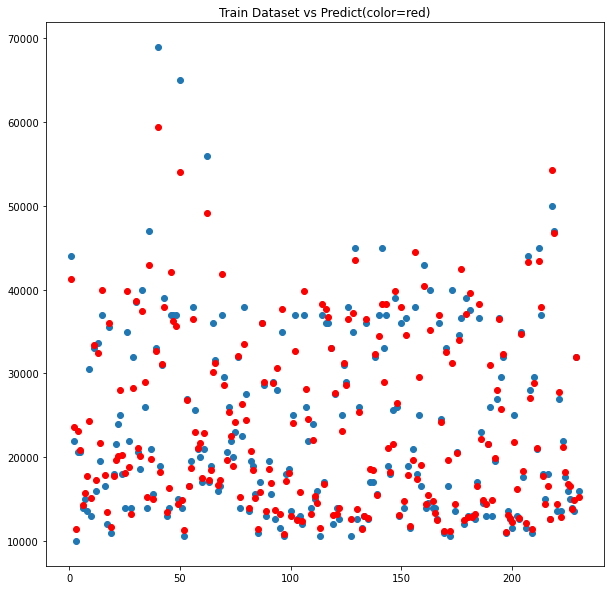

In [54]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(x=range(1,len(cars_train['price'])+1),y=cars_train['price'])
ax.scatter(x=range(1,len(cars_train['price'])+1),y=rfr_model.predict(cars_train.iloc[:,:-1]),color='r')
plt.title('Train Dataset vs Predict(color=red)')

In [55]:
cars_test = cars_encoded[~cars_encoded.isin(cars_train)].dropna()

In [56]:
len(cars_train)+len(cars_test)

378

In [57]:
cars_test

,miles,model_year,BMW,Tesla,Toyota,Volkswagen,Black,Blue,Brown,Gray,Green,Orange,Red,Silver,White,price
0,65012.0,2016.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25990.0
4,53446.0,2014.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15990.0
5,45754.0,2013.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18590.0
8,42577.0,2019.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30990.0
9,59633.0,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,96015.0,2013.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11990.0
371,58289.0,2016.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13990.0
372,44950.0,2016.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15990.0
373,60940.0,2012.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14990.0


Text(0.5, 1.0, 'Test Data\nReal vs Predict(color=red)')

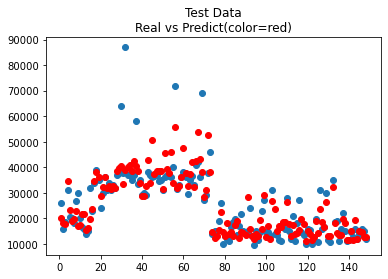

In [58]:
plt.scatter(x=range(1,len(cars_test['price'])+1),y=cars_test['price'])
plt.scatter(x=range(1,len(cars_test['price'])+1),y=rfr_model.predict(cars_test.iloc[:,:-1]),color='r')
plt.title('Test Data\nReal vs Predict(color=red)')

In [43]:
cars.groupby('brand').sum()['price']

brand
BMW           2025560
Tesla         3994550
Toyota         986170
Volkswagen    2160340
Name: price, dtype: int64